# Data Science Applications HW9 : Dog and Cat Classification 

### Instroductions.

 - Answer the following questions and submit a report (word, pdf or hwp) including codes and screenshots of relevant results, as well as your source code (py or ipynb) on iCampus.
 
 
 - Unzip the "cats_and_dogs_filtered.zip" file to access the datasets; the unzipped "cats_and_dogs_filtered" durectory contains subdirectories named "train" (1,000 cat images + 1,000 dog images), "validation" (500 cat images + 500 dog images) and "test" (empty) you will have to upload your own photos in the "your_picture" directory in the "test" directory to answer the qeustions.

Given cat and god images, use the VGG16 model to develop a binary image Clssifier. At the begining of your code, set the random seed as you student ID, i.e.,

In [1]:
import numpy as np
studentID = 2020710666
np.random.seed(studentID)

In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

### Data Pre-processing

1. Training set ; 1,000 cat images, 1,000 dog images


2. Validation set : 500 cat images, 500 dog images


3. Use `ImageDatagenerator()`and `.flow_from_dataframe()` (https://keras.io/api/preprocessing/image/) to feed input images.

    Apply data augmentation to the training set to imporve performance.
    
    Augmentation options : `rescale=1./255`, `rotation_range=20`, `width_shift_range=0.1`, `height_shift_range=0.1`, `shear_rage=0.1`, `zoom_range=0.1`, `horizontal_flip=True`, `fill_mode='nearest'`

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                rotation_range = 20,
                                                                width_shift_range = 0.1,
                                                                height_shift_range = 0.1,
                                                                shear_range = 0.1,                                                
                                                                zoom_range = 0.1,
                                                                horizontal_flip = True,
                                                                fill_mode = "nearest")

In [4]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory("./cats_and_dogs_filtered/train/",
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [6]:
valid_set = valid_datagen.flow_from_directory("./cats_and_dogs_filtered/validation/",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


### Binary Classification Model

1. Seuential + Pre-trained VGG16 (except Dense Layer) + Add 2 Dense Layers.


2. In the pre-trained VGG16 model, use Convolutional and Pooling layers, except for the last Dense layer (Fully Connected layer). Use the weights form ImageNet parameters where the input image size is (150,150,3).


3. In the first Dense layer the output size is 256 with the ReLU activation function.


4. in the second Dense layer, the output size is 1 with a sigmoid activation function.


5. During training, use the pre-trained VGG16 model with `trainable=False` to freeze the weights.


6. Print the model summary using `.summary()` to show the overall model architecture.

In [7]:
import keras
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [8]:
vgg16 = VGG16(weights = 'imagenet',
              include_top = False,
              input_shape=(150, 150, 3))

In [9]:
layer_dict = dict([(layer.name, layer) for layer in vgg16.layers])

In [10]:
x = layer_dict['block2_pool'].output

In [11]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

In [12]:
from keras.models import Model
custom_model = Model(input=vgg16.input, output=x)

c:\users\user\anaconda3\envs\dsa\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [13]:
for layer in custom_model.layers[:7]:
    layer.trainable = False

In [14]:
custom_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

### Model Compiling

1. Use binary cross entropy as the loss function


2. Start with a learning rate of 2e-5

In [15]:
from keras import optimizers
sgd = optimizers.SGD(lr=2e-5)

In [16]:
custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

### Model Training

1. Train your model using `fit_generator()`. Select proper parameters for `step_per_epoch` and `validation_steps`. `steps_per_epoch` is the total number of steps (batch or samples) is the total number of steps (batches of samples) to draw before stopping whe performing validation at the end of every epoch (`validation_data` required).


2. Use a batch size of 20 and 30 epochs.

In [17]:
steps_per_epoch = 2000 / 32
validation_steps = 1000 / 32

In [18]:
hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

Epoch 1/10
63/62 [==============================] - 122s 2s/step - loss: 2.7519 - accuracy: 0.5225 - val_loss: 2.7126 - val_accuracy: 0.5550
Epoch 2/10
63/62 [==============================] - 113s 2s/step - loss: 1.0717 - accuracy: 0.5570 - val_loss: 0.6324 - val_accuracy: 0.6030
Epoch 3/10
63/62 [==============================] - 119s 2s/step - loss: 0.9201 - accuracy: 0.5760 - val_loss: 0.5107 - val_accuracy: 0.6020
Epoch 4/10
63/62 [==============================] - 122s 2s/step - loss: 0.8228 - accuracy: 0.6075 - val_loss: 0.2251 - val_accuracy: 0.6050
Epoch 5/10
63/62 [==============================] - 121s 2s/step - loss: 0.7292 - accuracy: 0.6225 - val_loss: 0.9379 - val_accuracy: 0.6080
Epoch 6/10
63/62 [==============================] - 123s 2s/step - loss: 0.7217 - accuracy: 0.6140 - val_loss: 0.9357 - val_accuracy: 0.6320
Epoch 7/10
63/62 [==============================] - 120s 2s/step - loss: 0.6966 - accuracy: 0.6210 - val_loss: 0.4700 - val_accuracy: 0.6430
Epoch 8/10
63

In [19]:
print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 67.20%


### Questions

#### Question 1

Plot the training accurcay and the validation accuracy for each epoch on a graph, whrere the X-axis represents the number of epochs and Y-axis reoresents the accuracy values.

#### Question 2

Plot the training loss and the validation loss for each epoch on a graph, where the X-axis represents the number of epochs and Y-axis represents the loss vlaues.

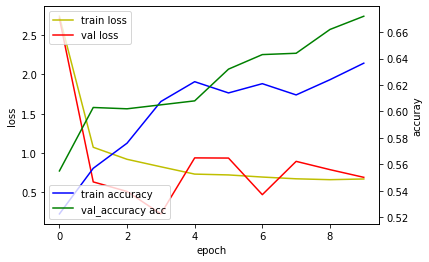

In [20]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val_accuracy acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

#### Question 3

Use two different optimizers of your choice for your model and show the corressponding accuracy values.

In [21]:
custom_model.compile(loss='binary_crossentropy',
                     optimizer="rmsprop",
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 134s 2s/step - loss: 569.9380 - accuracy: 0.5195 - val_loss: 166.5874 - val_accuracy: 0.5000
Epoch 2/10
63/62 [==============================] - 131s 2s/step - loss: 292.7406 - accuracy: 0.5405 - val_loss: 320.3939 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 133s 2s/step - loss: 232.7167 - accuracy: 0.5775 - val_loss: 346.8635 - val_accuracy: 0.5090
Epoch 4/10
63/62 [==============================] - 134s 2s/step - loss: 177.2208 - accuracy: 0.5950 - val_loss: 26.6280 - val_accuracy: 0.6200
Epoch 5/10
63/62 [==============================] - 133s 2s/step - loss: 151.3613 - accuracy: 0.5860 - val_loss: 189.8867 - val_accuracy: 0.5810
Epoch 6/10
63/62 [==============================] - 133s 2s/step - loss: 98.5517 - accuracy: 0.6255 - val_loss: 16.2702 - val_accuracy: 0.6820
Epoch 7/10
63/62 [==============================] - 131s 2s/step - loss: 67.2585 - accuracy: 0.6255 - val_loss: 10.8152 - val_accurac

In [22]:
custom_model.compile(loss='binary_crossentropy',
                     optimizer="adagrad",
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 127s 2s/step - loss: 17.2169 - accuracy: 0.5080 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 2/10
63/62 [==============================] - 131s 2s/step - loss: 7.4770 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 128s 2s/step - loss: 3.6412 - accuracy: 0.4985 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 4/10
63/62 [==============================] - 128s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/10
63/62 [==============================] - 129s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 6/10
63/62 [==============================] - 127s 2s/step - loss: 1.3171 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
63/62 [==============================] - 130s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 8/10
6

#### Question 4

Use five different learning rate values of your choice and show the corresponding accuracy values.

In [23]:
sgd = optimizers.SGD(lr=1e-1)

custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 121s 2s/step - loss: 0.6935 - accuracy: 0.4850 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/10
63/62 [==============================] - 123s 2s/step - loss: 0.6934 - accuracy: 0.4930 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 120s 2s/step - loss: 0.6935 - accuracy: 0.4880 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 4/10
63/62 [==============================] - 121s 2s/step - loss: 0.6934 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
63/62 [==============================] - 122s 2s/step - loss: 0.6935 - accuracy: 0.4880 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 6/10
63/62 [==============================] - 122s 2s/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 7/10
63/62 [==============================] - 122s 2s/step - loss: 0.6935 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
63

In [24]:
sgd = optimizers.SGD(lr=1e-2)

custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 122s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 2/10
63/62 [==============================] - 121s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 120s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
63/62 [==============================] - 121s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 5/10
63/62 [==============================] - 121s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 6/10
63/62 [==============================] - 118s 2s/step - loss: 0.8478 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
63/62 [==============================] - 123s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/10
63

In [25]:
sgd = optimizers.SGD(lr=1e-3)

custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 122s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
63/62 [==============================] - 121s 2s/step - loss: 0.6928 - accuracy: 0.5005 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 119s 2s/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/10
63/62 [==============================] - 122s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
63/62 [==============================] - 120s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 6/10
63/62 [==============================] - 120s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 7/10
63/62 [==============================] - 123s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 8/10
63

In [26]:
sgd = optimizers.SGD(lr=1e-4)

custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 122s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/10
63/62 [==============================] - 121s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 123s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/10
63/62 [==============================] - 126s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
63/62 [==============================] - 121s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/10
63/62 [==============================] - 121s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/10
63/62 [==============================] - 122s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
63

In [27]:
sgd = optimizers.SGD(lr=1e-5)

custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 10)

print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

Epoch 1/10
63/62 [==============================] - 122s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
63/62 [==============================] - 122s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 3/10
63/62 [==============================] - 123s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
63/62 [==============================] - 123s 2s/step - loss: 0.6929 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
63/62 [==============================] - 134s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/10
63/62 [==============================] - 121s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
63/62 [==============================] - 122s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 8/10
63

#### Question 5

Propose and apply method to improve the model performance (e.g., different model architecture, use of additional training data, etc.). Has the model accuracy increased or decreased and by how much?

In [28]:
# Xception
import keras
from keras.applications.xception import xception

xception = keras.applications.xception.Xception(include_top=False, 
                                                weights='imagenet', 
                                                input_shape=(150,150,3))

layer_dict = dict([(layer.name, layer) for layer in xception.layers])

x = layer_dict['block2_pool'].output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu', )(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

from keras.models import Model
custom_model = Model(input=xception.input, output=x)

for layer in custom_model.layers[:7]:
    layer.trainable = False
    
custom_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 74, 74, 32)        864       
_________________________________________________________________
block1_conv1_bn (BatchNormal (None, 74, 74, 32)        128       
_________________________________________________________________
block1_conv1_act (Activation (None, 74, 74, 32)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 72, 64)        18432     
_________________________________________________________________
block1_conv2_bn (BatchNormal (None, 72, 72, 64)        256       
_________________________________________________________________
block1_conv2_act (Activation (None, 72, 72, 64)        0   

c:\users\user\anaconda3\envs\dsa\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [29]:
from keras import optimizers
sgd = optimizers.SGD(lr=2e-5)

custom_model.compile(loss='binary_crossentropy',
                     optimizer=sgd,
                     metrics=['accuracy'])

In [30]:
steps_per_epoch = 2000 / 32
validation_steps = 1000 / 32

hist = custom_model.fit_generator(generator = training_set,
                                  steps_per_epoch = steps_per_epoch,
                                  validation_data= valid_set,
                                  validation_steps = validation_steps,
                                  epochs = 20)

Epoch 1/20
63/62 [==============================] - 163s 3s/step - loss: 0.8045 - accuracy: 0.5290 - val_loss: 0.5358 - val_accuracy: 0.5720
Epoch 2/20
63/62 [==============================] - 160s 3s/step - loss: 0.7143 - accuracy: 0.6020 - val_loss: 0.3628 - val_accuracy: 0.5960
Epoch 3/20
63/62 [==============================] - 162s 3s/step - loss: 0.7043 - accuracy: 0.6025 - val_loss: 0.4529 - val_accuracy: 0.5730
Epoch 4/20
63/62 [==============================] - 161s 3s/step - loss: 0.6595 - accuracy: 0.6200 - val_loss: 0.7139 - val_accuracy: 0.5430
Epoch 5/20
63/62 [==============================] - 161s 3s/step - loss: 0.6715 - accuracy: 0.6180 - val_loss: 0.6844 - val_accuracy: 0.5890
Epoch 6/20
63/62 [==============================] - 161s 3s/step - loss: 0.6384 - accuracy: 0.6405 - val_loss: 0.5338 - val_accuracy: 0.6360
Epoch 7/20
63/62 [==============================] - 162s 3s/step - loss: 0.6307 - accuracy: 0.6500 - val_loss: 0.5255 - val_accuracy: 0.5810
Epoch 8/20
63

In [31]:
print("-- Evaluate --")
scores = custom_model.evaluate_generator(valid_set, steps=validation_steps)
print("%s: %.2f%%" %(custom_model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 68.70%


#### Question 6

Use 2 face images of yourself and show what the are classified as. What are the probabilities of each being a dog/cat?

In [32]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_set = valid_datagen.flow_from_directory("./cats_and_dogs_filtered/test/",
                                              target_size = (150, 150),
                                              batch_size = 2,
                                              class_mode = 'binary')

print("-- Predict --")
output = custom_model.predict_generator(test_set, steps=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

def class_name (x) : 
    if x <= 0.5  : 
        return "cat"
    else : 
        return "dog"

print("1st Image predicted {} class, confidence = {}" .format(output[0], class_name(output[0])))
print("2nd Image predicted {} class, confidence = {}" .format(output[1], class_name(output[1])))

Found 2 images belonging to 1 classes.
-- Predict --
1st Image predicted [0.088] class, confidence = cat
2nd Image predicted [0.703] class, confidence = dog


#### Question 7

Theoretically, how should your dogcat classifer perform when it is fed with human face images? What is the correct way to approach the task of classifying human face images? Explain in your own words.

이론적으로, 분류 문제에서는 학습이 된 레이블에 대해서 예측을 진행하기 때문에, 사람의 이미를 새로운 레이블로 학습을 시켜야, 주어진 이미지에 대해서 사람, 고양이, 개로 분류시킬 수 있다. 현재의 모델은 개와 고양이 2개 중에 어떤 레이블에 더 가까운지 예측하는 모형이기 때문에 어떤 사진이 들어오더라고 개 또는 고양이 중에 한개로 분류하게 된다.

#### Question 8

Fix your code to properly handle the issue of human face image classification in your dog/cat classifier.

In [36]:
# Threshold를 줘서 0.0 ~ 0.2 일 경우에만 cat
# 0.8 ~ 1.0 인 경우에만 dog
# 나머지는 분류 불가

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_set = valid_datagen.flow_from_directory("./cats_and_dogs_filtered/test/",
                                              target_size = (150, 150),
                                              batch_size = 2,
                                              class_mode = 'binary')

print("-- Predict --")
output = custom_model.predict_generator(test_set, steps=1)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

def class_name (x) : 
    if x <= 0.2  : 
        return "cat"
    elif x >= 0.8 :
        return "dog"
    else : 
        return "etc"

print("1st Image predicted {} class" .format(class_name(output[0])))
print("2nd Image predicted {} class" .format(class_name(output[1])))

Found 2 images belonging to 1 classes.
-- Predict --
1st Image predicted cat class
2nd Image predicted etc class


#### Question 9

is the fixed solution a generalized approach? What happens when fish, bird or panda images are fed into your classifier in Question 8?

사람의 이미지와 마찬가지로, 모델을 학습시킬 때 fish나 bird 등의 레이블에 대해서 학습시키지 않는다면, 역시 개 또는 고양이로 분류하게 된다. 그렇기 때문에 각각의 동물들을 잘 분류하기 위해서는 필요한 레이블에 대하여 데이터를 학습시켜야한다.

#### Question 10

How would you handle the different cases presented in Question 9 (fish, bird, or panda images)?

현재 상태에서는 fish나 bird 등의 이미지가 없기 때문에 threshold를 주어서 sigmoid의 output 값이 0.0 ~ 0.2 인 경우에는 고양이로 분류, 0.8 ~ 1.0 인 경우에는 개로 분류하고 나머지의 경우 etc라는 새로운 카테고리롤 분류할 수 있다.